![HenryLogo](https://d31uz8lwfmyn8g.cloudfront.net/Assets/logo-henry-white-lg.png)

# **Proyecto integrador**

### 3. Modelamiento

Una vez preparados los datos, se procederá con el modelamiento. Recuerden que el objetivo es clasificar a un paciente como hospitalizado o no hospitalizado, teniendo en cuenta un data set que contiene información referente a antecedentes del paciente, morbilidad asociada al paciente y antecedentes relacionados con la toma de la biopsia y complicaciones infecciosas.




Carguen la base de datos preparada desde la fase 2.

In [63]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report, precision_recall_curve
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.feature_selection import SelectKBest, mutual_info_classif

from collections import Counter

In [64]:
data = pd.read_csv('Hospitalizacion.csv')

In [65]:
del(data['Unnamed: 0'])

In [73]:
data

,EDAD,DIABETES,PSA,VOLUMEN PROSTATICO,NUMERO DE MUESTRAS TOMADAS,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO_HEMOCULTIVO,TIPO DE CULTIVO_HEMOCULTIVO Y UROCULTIVO,TIPO DE CULTIVO_NO,TIPO DE CULTIVO_UROCULTIVO,AGENTE AISLADO_NO,AGENTE AISLADO_PSEUDOMONAS AERUGINOSA,"PATRON DE RESISTENCIA_ AMPI R, CIPRO R, GENTA R, SULFA M R",PATRON DE RESISTENCIA_MULTI SENSIBLE,PATRON DE RESISTENCIA_NO,"PATRON DE RESISTENCIA_RESISTENTE A AMPI, CIPRO Y GENTA","PATRON DE RESISTENCIA_RESISTENTE A AMPI, SULFA, CEFADROXILO, CEFUROXIMO, CIPRO Y CEFEPIME, CEFOTAXIMA",HOSPITALIZACION
0,53,0,4.0,1,12,1,1,0,0,0,1,0,1,0,0,0,1,0,0,1
1,56,0,7.7,1,12,1,1,0,0,0,1,0,1,0,0,0,1,0,0,1
2,57,0,29.0,1,24,1,1,0,1,0,0,0,0,0,1,0,0,0,0,1
3,56,0,7.0,1,12,1,1,0,0,0,1,0,1,0,0,0,1,0,0,1
4,55,0,29.0,1,24,1,1,0,1,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553,57,0,4.8,0,12,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0
554,75,0,75.0,1,12,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0
555,78,0,9.3,1,12,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0
556,67,0,6.0,1,12,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0


In [56]:
#data = data.drop("NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA",axis = 1)

Separen el dataset en X, y (variable objetivo)

In [66]:
X = data.iloc[:, :-1].values # Variables independientes
y = data.iloc[:, -1].values # Variable dependiente (la que queremos predecir)

Separen el dataset en X_train, X_test, y_train y y_test

In [67]:
from sklearn.model_selection import train_test_split # Importamos la librería para dividir el dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 10)

In [68]:
from sklearn.preprocessing import StandardScaler # Importamos la librería para escalar las variables independientes
sc = StandardScaler() # Creamos el objeto para escalar las variables
X_train = sc.fit_transform(X_train) # Escalamos las variables de entrenamiento
X_test = sc.transform(X_test) # Escalamos las variables de test

In [69]:
from imblearn.over_sampling import SMOTE

counter = Counter(y_train)
print('Antes',counter)
# oversampling the train dataset using SMOTE
smt = SMOTE()
#X_train, y_train = smt.fit_resample(X_train, y_train)
X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)

counter = Counter(y_train_sm)
print('Despues',counter)

Antes Counter({0: 426, 1: 20})
Despues Counter({0: 426, 1: 426})


Instancien, entrenen y predigan sobre un árbol de decisión asignando una profundidad máxima arbitraria

In [70]:
from sklearn.tree import DecisionTreeClassifier 
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 10, max_depth=6) 
classifier.fit(X_train_sm, y_train_sm)

DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=10)

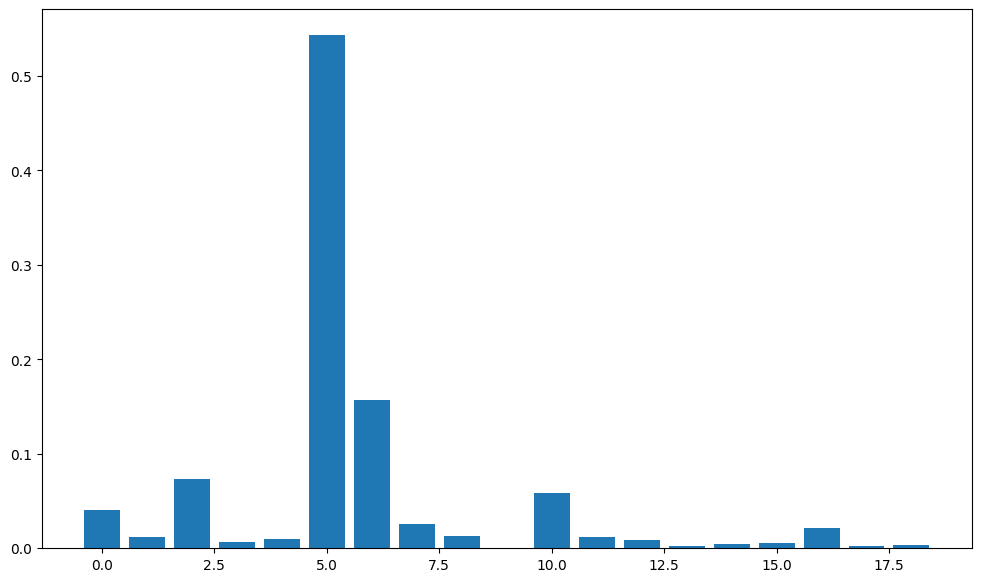

In [81]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

#Entrena tu modelo
model = RandomForestClassifier()
model.fit(X_train, y_train)

#Obtiene la importancia de cada variable
importances = model.feature_importances_

#Grafica la importancia de cada variable
plt.figure(figsize=(12,7))
plt.bar(range(len(importances)), importances)
plt.show()

Realicen la matriz de confusión para este modelo. Se recomienda utilizar mapa de calor para la visualización. 

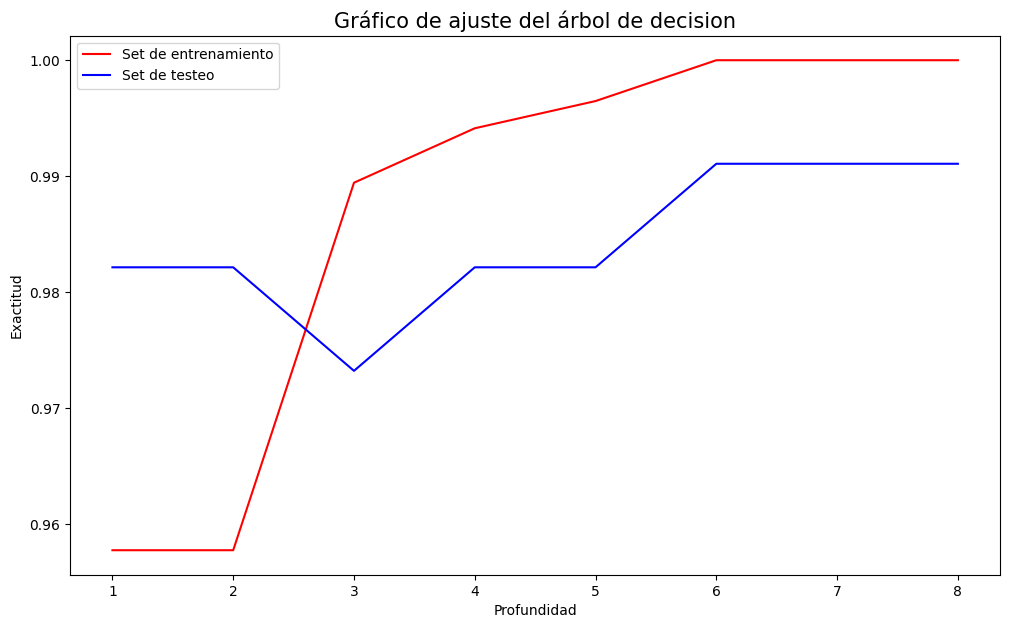

In [62]:
train_prec =  []
eval_prec = []
max_deep_list = list(range(1, 9))

for deep in max_deep_list:
    clf_3 = DecisionTreeClassifier(max_depth=deep, criterion='entropy')
    clf_3.fit(X_train_sm, y_train_sm)
    train_prec.append(clf_3.score(X_train_sm, y_train_sm))
    eval_prec.append(clf_3.score(X_test, y_test))

plt.figure(figsize=(12,7))
plt.plot(max_deep_list, train_prec, color='r', label='Set de entrenamiento')
plt.plot(max_deep_list, eval_prec, color='b', label='Set de testeo')
plt.title('Gráfico de ajuste del árbol de decision', fontsize = 15)
plt.legend()
plt.ylabel('Exactitud')
plt.xlabel('Profundidad')
plt.show()

Seleccione tres métricas de evaluación para este modelo de clasificación y describa el significado de cada una de ellas para el modelo creado.

Realice un diagrama de la importancia de cada variable respecto a la clasificación de la variable objetivo

Encuentre cuál sería un valor óptimo para el hiperparámetro **max_depth** para el árbol de decisión. Construya un modelo con este valor y compare las métricas de evaluación respecto al modelo creado con una profundidad arbitraria. 

Instancien, entrenen y predigan sobre un modelo de k-vecinos asignando una cantidad de vecinos k-aribitraria. 

Encuentre el valor óptimo para k

Halle las mismas tres métricas de evaluación para este modelo de clasificación y compare los valores para el performance, respecto al árbol de decisión cuyo hiperparámetro **max_depth** se optimizó. ¿Qué puede concluir? 

De acuerdo con lo aprendido en el módulo, ¿Cómo cree que se puede mejorar el performance de este modelo? 

R/